# Exploring the datasets

Datasets used in this project:

* [Ryerson Audio-Visual Database of Emotional Speech and Song (Ravdess)](#rav)
* [Crowd-sourced Emotional Mutimodal Actors Dataset (Crema-D)](#crema)
* [Surrey Audio-Visual Expressed Emotion (Savee)](#save)
* [Toronto emotional speech set (Tess)](#tess)

In [1]:
# Array operations and useful analysis functionalities
import pandas as pd
import numpy as np

# provide tools to deal with filenames, paths, directories
import os
import sys
 
# Libraries for Audio files
import librosa
import librosa.display
import glob

# To play sound in the notebook
import IPython.display as ipd 

# Libraries for visualisations in the notebook
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
SAVEE = "./data/Savee/ALL/"
TESS = "./data/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/"
CREMA = "./data/Crema/AudioWAV/"
RAV = "./data/RAVDESS/audio_speech_actors_01-24/"

# Exploring RAVDESS dataset <a class="anchor" id="rav"></a>

In [3]:
# creating dictionaries and function to decipher the information in the files
modality = {'01':'full_av','02':'video_only','03':'audio_only'}
vocal_channel = {'01':'speech','02':'song'}
emotion = {'01':'neutral','02':'calm','03':'happy','04':'sad','05':'angry','06':'fear','07':'disgust','08':'surprised'}
emotional_intensity = {'01':'normal','02':'strong'}
statement = {'01':'Kids are talking by the door','02':'Dogs are sitting by the door'}
reptition = {'01':'first_repitition','02':'second_repetition'}
def actor_f(num):
    if int(num)%2==0: return('female')
    else: return('male')

In [4]:
# List of the actors 
rav_directory_list = sorted(os.listdir(RAV))

In [5]:
# For each of the actors, we obtain the label information from the filenames:
rav_audio_dict = {}
for actor in rav_directory_list:
    actor_dir = os.path.join(RAV,actor)
    actor_files = os.listdir(actor_dir)
    actor_dict = [i.replace(".wav","").split("-") for i in actor_files]
    dict_entry = {os.path.join(actor_dir,i):j for i,j in zip(actor_files,actor_dict)}
    rav_audio_dict.update(dict_entry)
    

In [6]:
# cast the in information  as a dataframe
#transpose it so that the labels appear in the columns and the filenames become the row indices
rav_audio_dict = pd.DataFrame(rav_audio_dict).T

# give the columns an appropriate name
rav_audio_dict.columns = ['modality','vocal_channel','emotion','emotional_intensity','statement','repetition','actor']
rav_audio_dict.head(5)

,modality,vocal_channel,emotion,emotional_intensity,statement,repetition,actor
./data/RAVDESS/audio_speech_actors_01-24/Actor_01/03-01-08-02-02-01-01.wav,03,01,08,02,02,01,01
./data/RAVDESS/audio_speech_actors_01-24/Actor_01/03-01-08-01-01-01-01.wav,03,01,08,01,01,01,01
./data/RAVDESS/audio_speech_actors_01-24/Actor_01/03-01-05-01-02-01-01.wav,03,01,05,01,02,01,01
./data/RAVDESS/audio_speech_actors_01-24/Actor_01/03-01-06-01-02-02-01.wav,03,01,06,01,02,02,01
./data/RAVDESS/audio_speech_actors_01-24/Actor_01/03-01-06-02-01-02-01.wav,03,01,06,02,01,02,01


In [7]:
# use the dictionaries and function created above to transform the digit-encoded labels into human-readable format:
rav_audio_dict.modality = rav_audio_dict.modality.map(modality)
rav_audio_dict.vocal_channel = rav_audio_dict.vocal_channel.map(vocal_channel)
rav_audio_dict.emotion = rav_audio_dict.emotion.map(emotion)
rav_audio_dict.emotional_intensity = rav_audio_dict.emotional_intensity.map(emotional_intensity)
rav_audio_dict.statement = rav_audio_dict.statement.map(statement)
rav_audio_dict.repetition = rav_audio_dict.repetition.map(reptition)
rav_audio_dict['actor_gender'] = rav_audio_dict.actor.apply(actor_f)
rav_audio_dict['source'] = 'RAVDESS'

In [8]:
rav_audio_dict.sample(5)

,modality,vocal_channel,emotion,emotional_intensity,statement,repetition,actor,actor_gender,source
./data/RAVDESS/audio_speech_actors_01-24/Actor_08/03-01-05-01-02-01-08.wav,audio_only,speech,angry,normal,Dogs are sitting by the door,first_repitition,08,female,RAVDESS
./data/RAVDESS/audio_speech_actors_01-24/Actor_07/03-01-06-01-02-02-07.wav,audio_only,speech,fear,normal,Dogs are sitting by the door,second_repetition,07,male,RAVDESS
./data/RAVDESS/audio_speech_actors_01-24/Actor_09/03-01-04-02-02-01-09.wav,audio_only,speech,sad,strong,Dogs are sitting by the door,first_repitition,09,male,RAVDESS
./data/RAVDESS/audio_speech_actors_01-24/Actor_21/03-01-07-01-02-01-21.wav,audio_only,speech,disgust,normal,Dogs are sitting by the door,first_repitition,21,male,RAVDESS
./data/RAVDESS/audio_speech_actors_01-24/Actor_17/03-01-03-02-01-02-17.wav,audio_only,speech,happy,strong,Kids are talking by the door,second_repetition,17,male,RAVDESS


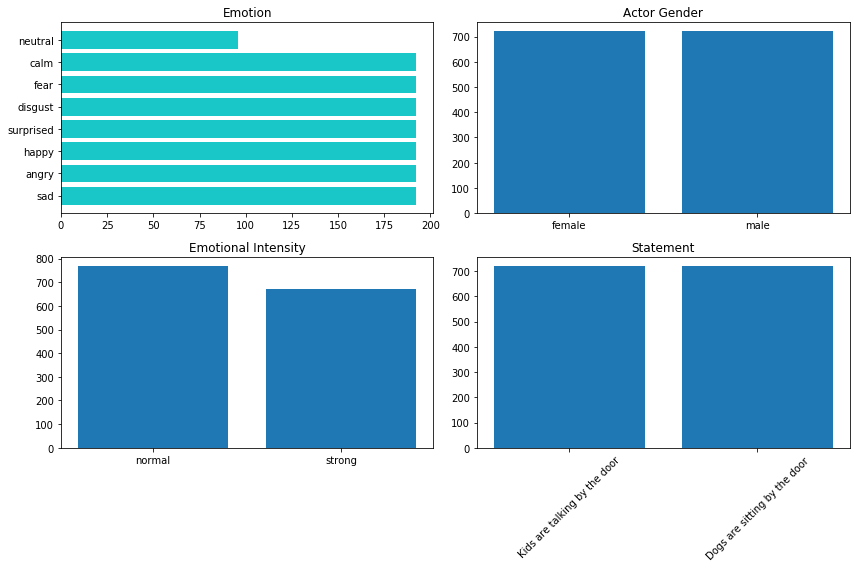

In [9]:
fig, (ax1,ax2) = plt.subplots(2, 2,figsize=(12,8))

ax1[0].barh(y=rav_audio_dict.emotion.value_counts().index,width=rav_audio_dict.emotion.value_counts().values, color = '#1ac7c8')
ax1[0].set_title('Emotion')

ax1[1].bar(x=rav_audio_dict.actor_gender.value_counts().index,height=rav_audio_dict.actor_gender.value_counts().values)
ax1[1].set_title('Actor Gender')

ax2[0].bar(x=rav_audio_dict.emotional_intensity.value_counts().index,height=rav_audio_dict.emotional_intensity.value_counts().values)
ax2[0].set_title('Emotional Intensity')

ax2[1].bar(x=rav_audio_dict.statement.value_counts().index,height=rav_audio_dict.statement.value_counts().values)
plt.xticks(rotation=45)
ax2[1].set_title('Statement')

# Remove empty white space around the plot
plt.tight_layout()

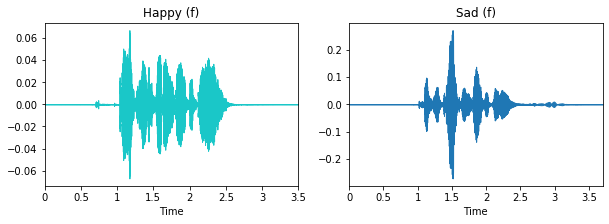

In [10]:
# Pick a happy track (female)
fname_happy = RAV + 'Actor_22/03-01-03-01-02-01-22.wav'
# sad (female)
fname_sad = RAV + 'Actor_17/03-01-04-02-01-02-17.wav' 
# 2. Load the audio as a waveform `y`
#    Store the sampling rate as `sr`
y,sr = librosa.load(fname_happy)
y2,sr = librosa.load(fname_sad)
fig, ax= plt.subplots(nrows=1, ncols=2, figsize=(10, 3))
librosa.display.waveplot(y, sr=sr, ax =ax [0],color='#1ac7c8')
ax[0].set(title='Happy (f)')

librosa.display.waveplot(y2, sr=sr, ax =ax [1])
ax[1].set(title='Sad (f)')

# Lets play the audio 
ipd.Audio(fname_happy)

# Exploring CREMA-D dataset <a class="anchor" id="crema"></a>

In [11]:
crema_directory_list = sorted(os.listdir(CREMA))

In [12]:
# for each actor obtain the label information from the filenames
crema_audio_dict = {}
for i in crema_directory_list:
    actor_dir = os.path.join(CREMA,i)
    actor_dict = i.replace(".wav","").split("_")
    dict_entry = {os.path.join(actor_dir):actor_dict}
    crema_audio_dict.update(dict_entry)

In [13]:
crema_audio_dict = pd.DataFrame(crema_audio_dict).T
crema_audio_dict.columns = ['actor','statement','emotion','emotional_intensity']
crema_audio_dict.head(5)

,actor,statement,emotion,emotional_intensity
./data/Crema/AudioWAV/1001_DFA_ANG_XX.wav,1001,DFA,ANG,XX
./data/Crema/AudioWAV/1001_DFA_DIS_XX.wav,1001,DFA,DIS,XX
./data/Crema/AudioWAV/1001_DFA_FEA_XX.wav,1001,DFA,FEA,XX
./data/Crema/AudioWAV/1001_DFA_HAP_XX.wav,1001,DFA,HAP,XX
./data/Crema/AudioWAV/1001_DFA_NEU_XX.wav,1001,DFA,NEU,XX


In [14]:
# creating dictionaries and function to  decipher the information in the files
emotion = {'ANG':'angry','DIS':'disgust','FEA':'fear','HAP':'happy','NEU':'neutral','SAD':'sad'}
emotional_intensity = {'LO':'low','MD':'medium','HI':'high','XX':'unspecified'}
statement = {'IEO':'Its eleven oclock' ,'TIE':'That is exactly what happened', 'IOM': 'I''m on my way to the meeting',
             'IWW':'I wonder what this is about','TAI':'The airplane is almost full','MTI':'Maybe tomorrow it will be cold',
             'IWL':'I would like a new alarm clock','ITH':'I think I have a doctor''s appointment','DFA':'Don''t forget a jacket.',
             'ITS':'I think I''ve seen this before','TSI':'The surface is slick','WSI':'We''ll stop in a couple of minutes'}
#female voices 
female = [1002,1003,1004,1006,1007,1008,1009,1010,1012,1013,1018,1020,1021,1024,1025,1028,1029,1030,1037,1043,1046,1047,1049,
          1052,1053,1054,1055,1056,1058,1060,1061,1063,1072,1073,1074,1075,1076,1078,1079,1082,1084,1089,1091]

def actor_f(num):
    if int(num) in female:return('female')
    else: return('male')

In [15]:
# map the digits to a human-readable text
crema_audio_dict['actor_gender'] = crema_audio_dict.actor.apply(actor_f)
crema_audio_dict['source'] = 'CREMA'
crema_audio_dict.statement = crema_audio_dict.statement.map(statement)
crema_audio_dict.emotion = crema_audio_dict.emotion.map(emotion)
crema_audio_dict.emotional_intensity = crema_audio_dict.emotional_intensity.map(emotional_intensity)

In [16]:
crema_audio_dict.head (5)

,actor,statement,emotion,emotional_intensity,actor_gender,source
./data/Crema/AudioWAV/1001_DFA_ANG_XX.wav,1001,Dont forget a jacket.,angry,unspecified,male,CREMA
./data/Crema/AudioWAV/1001_DFA_DIS_XX.wav,1001,Dont forget a jacket.,disgust,unspecified,male,CREMA
./data/Crema/AudioWAV/1001_DFA_FEA_XX.wav,1001,Dont forget a jacket.,fear,unspecified,male,CREMA
./data/Crema/AudioWAV/1001_DFA_HAP_XX.wav,1001,Dont forget a jacket.,happy,unspecified,male,CREMA
./data/Crema/AudioWAV/1001_DFA_NEU_XX.wav,1001,Dont forget a jacket.,neutral,unspecified,male,CREMA


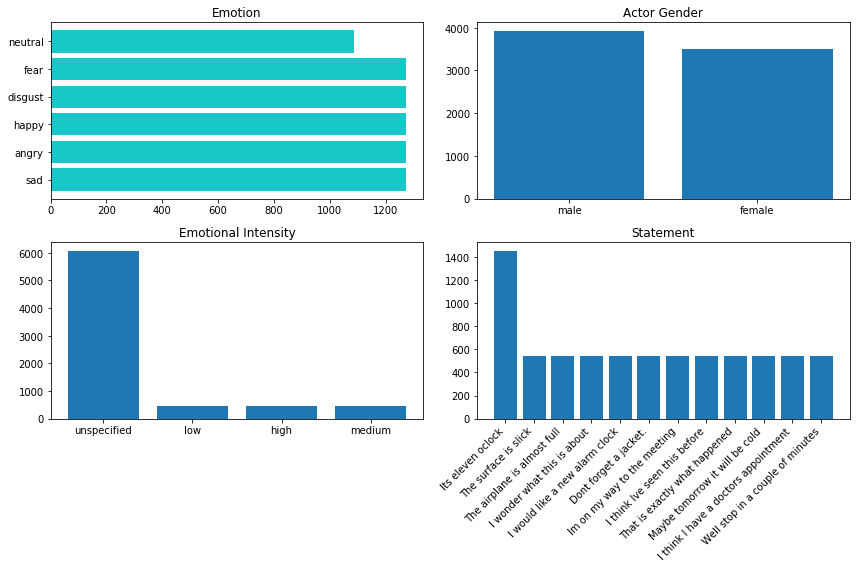

In [17]:
fig, (ax1,ax2) = plt.subplots(2, 2,figsize=(12,8))

ax1[0].barh(y=crema_audio_dict.emotion.value_counts().index,width=crema_audio_dict.emotion.value_counts().values, color = '#1ac7c8')
ax1[0].set_title('Emotion')

ax1[1].bar(x=crema_audio_dict.actor_gender.value_counts().index,height=crema_audio_dict.actor_gender.value_counts().values)
ax1[1].set_title('Actor Gender')

ax2[0].bar(x=crema_audio_dict.emotional_intensity.value_counts().index,height=crema_audio_dict.emotional_intensity.value_counts().values)
ax2[0].set_title('Emotional Intensity')

ax2[1].bar(x=crema_audio_dict.statement.value_counts().index,height=crema_audio_dict.statement.value_counts().values)
ax2[1].set_title('Statement')
# 'ha'changes the alignment to right-aligned 
plt.xticks(rotation=45, ha='right')

# Remove empty white space around the plot
plt.tight_layout()

# Exploring SAVEE dataset  <a class="anchor" id="save"></a>

In [18]:
savee_directory_list = sorted(os.listdir(SAVEE))

In [19]:
savee_audio_dict = {}
for i in savee_directory_list:
    actor_dir = os.path.join(SAVEE,i)
    actor_dict = i.replace(".wav","").split("_")
    # the last two character from the 2nd sting show the number of the sentence
    # remove them since they are not relevant
    second_elements = actor_dict[1]
    for x in second_elements:
        actor_dict[1]=second_elements[:-2]
        
    dict_entry = {os.path.join(actor_dir):actor_dict}
    savee_audio_dict.update(dict_entry)

In [20]:
savee_audio_dict = pd.DataFrame(savee_audio_dict).T
savee_audio_dict.columns = ['actor','emotion']
savee_audio_dict

,actor,emotion
./data/Savee/ALL/DC_a01.wav,DC,a
./data/Savee/ALL/DC_a02.wav,DC,a
./data/Savee/ALL/DC_a03.wav,DC,a
./data/Savee/ALL/DC_a04.wav,DC,a
./data/Savee/ALL/DC_a05.wav,DC,a
...,...,...
./data/Savee/ALL/KL_su11.wav,KL,su
./data/Savee/ALL/KL_su12.wav,KL,su
./data/Savee/ALL/KL_su13.wav,KL,su
./data/Savee/ALL/KL_su14.wav,KL,su


In [21]:
# creating dictionary to  decipher the information in the files
emotion = {'a':'angry','d':'disgust','f':'fear','su':'surprised','h':'happy','n':'neutral','sa':'sad'}

In [22]:
# map the digits to a human-readable text
savee_audio_dict.emotion = savee_audio_dict.emotion.map(emotion)
# this dataset contains only male audio files 
savee_audio_dict['actor_gender'] = "male"
savee_audio_dict['source']='SAVEE'
savee_audio_dict.head(5)

,actor,emotion,actor_gender,source
./data/Savee/ALL/DC_a01.wav,DC,angry,male,SAVEE
./data/Savee/ALL/DC_a02.wav,DC,angry,male,SAVEE
./data/Savee/ALL/DC_a03.wav,DC,angry,male,SAVEE
./data/Savee/ALL/DC_a04.wav,DC,angry,male,SAVEE
./data/Savee/ALL/DC_a05.wav,DC,angry,male,SAVEE


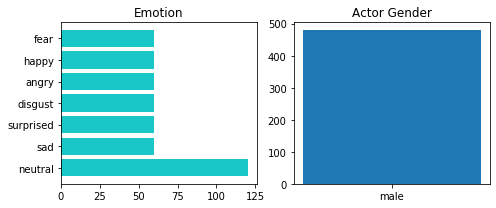

In [23]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))
axes[0].barh(y=savee_audio_dict.emotion.value_counts().index,width=savee_audio_dict.emotion.value_counts().values, color = '#1ac7c8')
axes[0].set_title('Emotion')

axes[1].bar(x=savee_audio_dict.actor_gender.value_counts().index,height=savee_audio_dict.actor_gender.value_counts().values)
axes[1].set_title('Actor Gender')

# Remove empty white space around the plot
fig.tight_layout()

# Exploring TESS dataset  <a class="anchor" id="tess"></a>

In [24]:
tess_directory_list = sorted(os.listdir(TESS))

In [25]:
tess_audio_dict = {}
for actor in tess_directory_list:
    actor_dir = os.path.join(TESS,actor)
    actor_files = os.listdir(actor_dir)
    actor_dict = [i.replace(".wav","").split("_") for i in actor_files]
    dict_entry = {os.path.join(actor_dir,i):j for i,j in zip(actor_files,actor_dict)}
    tess_audio_dict.update(dict_entry)

In [26]:
tess_audio_dict = pd.DataFrame(tess_audio_dict).T
tess_audio_dict.columns = ['actor','statement','emotion']
tess_audio_dict['actor_gender'] = "female"
tess_audio_dict['source']='TESS'
tess_audio_dict

,actor,statement,emotion,actor_gender,source
./data/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Fear/OAF_third_fear.wav,OAF,third,fear,female,TESS
./data/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Fear/OAF_yes_fear.wav,OAF,yes,fear,female,TESS
./data/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Fear/OAF_thin_fear.wav,OAF,thin,fear,female,TESS
./data/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Fear/OAF_lose_fear.wav,OAF,lose,fear,female,TESS
./data/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Fear/OAF_pole_fear.wav,OAF,pole,fear,female,TESS
...,...,...,...,...,...
./data/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_sad/YAF_pass_sad.wav,YAF,pass,sad,female,TESS
./data/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_sad/YAF_door_sad.wav,YAF,door,sad,female,TESS
./data/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_sad/YAF_ring_sad.wav,YAF,ring,sad,female,TESS
./data/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_sad/YAF_chair_sad.wav,YAF,chair,sad,female,TESS


In [27]:
# creating dictionary to  decipher the information in the files
# plesent surprise will be labeled as suprised
emotion = {'angry':'angry','disgust':'disgust','fear':'fear',
           'ps':'surprised','happy':'happy','neutral':'neutral','sad':'sad'}

In [28]:
tess_audio_dict.emotion = tess_audio_dict.emotion.map(emotion)
tess_audio_dict

,actor,statement,emotion,actor_gender,source
./data/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Fear/OAF_third_fear.wav,OAF,third,fear,female,TESS
./data/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Fear/OAF_yes_fear.wav,OAF,yes,fear,female,TESS
./data/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Fear/OAF_thin_fear.wav,OAF,thin,fear,female,TESS
./data/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Fear/OAF_lose_fear.wav,OAF,lose,fear,female,TESS
./data/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Fear/OAF_pole_fear.wav,OAF,pole,fear,female,TESS
...,...,...,...,...,...
./data/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_sad/YAF_pass_sad.wav,YAF,pass,sad,female,TESS
./data/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_sad/YAF_door_sad.wav,YAF,door,sad,female,TESS
./data/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_sad/YAF_ring_sad.wav,YAF,ring,sad,female,TESS
./data/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_sad/YAF_chair_sad.wav,YAF,chair,sad,female,TESS


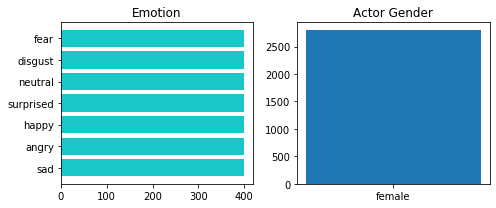

In [29]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))
axes[0].barh(y=tess_audio_dict.emotion.value_counts().index,width=tess_audio_dict.emotion.value_counts().values, color = '#1ac7c8')
axes[0].set_title('Emotion')

axes[1].bar(x=tess_audio_dict.actor_gender.value_counts().index,height=tess_audio_dict.actor_gender.value_counts().values)
axes[1].set_title('Actor Gender')

# Remove empty white space around the plot
fig.tight_layout()

# Create a Dataframe using the data frames created so far 

In [30]:
RAV_df=rav_audio_dict[["emotion","actor_gender","source"]]

CREMA_df=crema_audio_dict[["emotion","actor_gender","source"]]

SAVE_df=savee_audio_dict[["emotion","actor_gender","source"]]

TESS_df=tess_audio_dict[["emotion","actor_gender","source"]]

In [31]:
# creating a dataframe 
df = pd.concat([RAV_df,CREMA_df,SAVE_df,TESS_df], axis = 0)
print(df.emotion.value_counts())

sad          1923
angry        1923
happy        1923
disgust      1923
fear         1923
neutral      1703
surprised     652
calm          192
Name: emotion, dtype: int64


In [32]:
df = df.sort_values(by=['emotion'])
df.index.name='path'
df.to_csv("data_path.csv")

In [33]:
print (df.index.name)

path


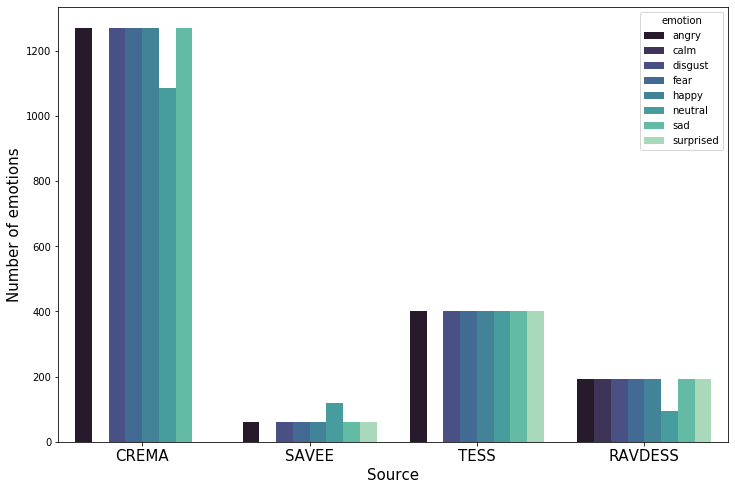

In [34]:
plt.figure(figsize=(12, 8))
plt.xticks(fontsize=15)

sns.countplot(x = 'source', hue = "emotion", data = df, palette="mako")
plt.ylabel('Number of emotions', size=15)
plt.xlabel('Source', size=15)
#plt.ylabel('Anzahl der Emotionen', size=15)
#plt.xlabel('Datensatz', size=15)
plt.show()

Text(0.5, 0, 'Emotionen')

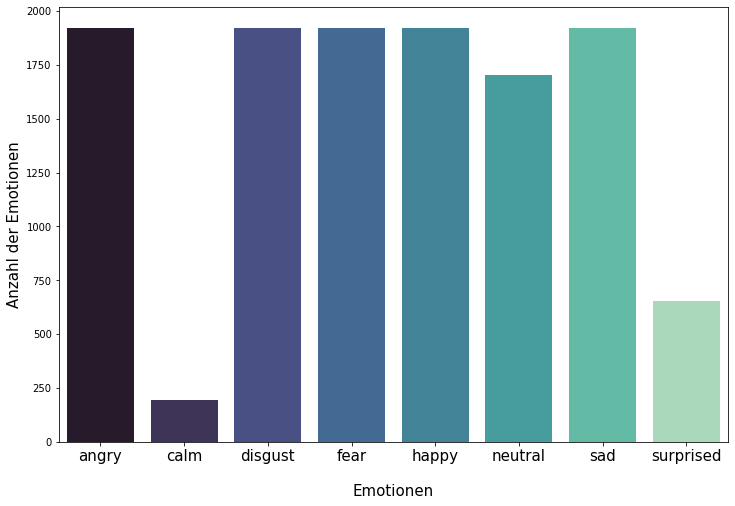

In [35]:
plt.figure(figsize=(12, 8))
plt.xticks(fontsize=15)
sns.countplot('emotion', data=df,palette="mako") # mako
#sns.countplot('emotion', data=df,palette="Set3_r")
#plt.title('Distribution of Emotions', size=20)
plt.ylabel('Anzahl der Emotionen', size=15)
plt.xlabel('Emotionen', size=15, labelpad = 20)
#plt.ylabel('Number of emotions', size=15)
#plt.xlabel('Emotions', size=15)


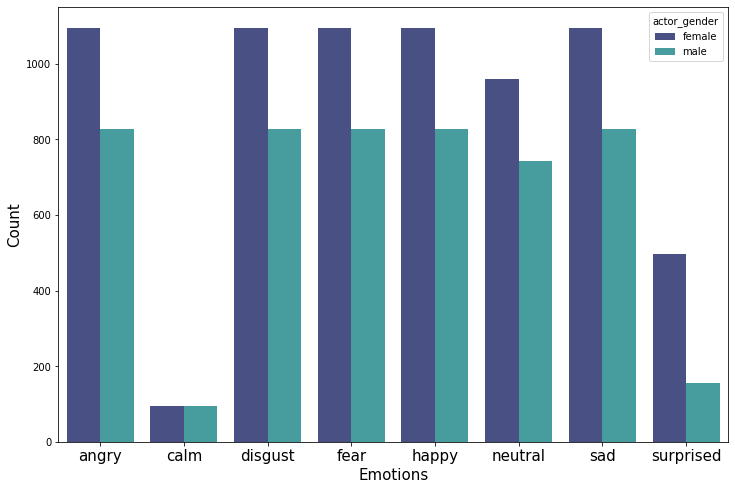

In [36]:
plt.figure(figsize=(12, 8))
plt.xticks(fontsize=15)

sns.countplot(x = 'emotion', hue = "actor_gender", data = df, palette="mako")
plt.ylabel('Count', size=15)
plt.xlabel('Emotions', size=15)
plt.show()

Almost every dataset has an unequal representation of classes. This isn’t a problem as long as the difference is small. However, in this case some classes contain many more examples than the other (calm and surprised). This is a problem since many models don’t work very well at identifying the minority classes. The classifiers tend to ignore small classes while concentrating on classifying the large ones accurately.

In [37]:
df_female = df[df.actor_gender == 'female']
df_female.to_csv("data_female_path.csv")

In [38]:
df_male=df[df.actor_gender == 'male']
df_male.to_csv("data_male_path.csv")

# Explore the male neutral emotion

In [39]:
#Add paths and get signals.
file1= RAV + 'Actor_21/03-01-01-01-02-02-21.wav'
file2= CREMA + '1048_DFA_NEU_XX.wav'
file3=SAVEE + 'JK_n04.wav'
file4= TESS + 'YAF_neutral/YAF_soup_neutral.wav'

# Load the audio as a waveform `file(n)` and store the sampling rate as `sr`
signal1,sample_rate = librosa.load(file1, sr=22050)
signal2,sample_rate = librosa.load(file2, sr=22050)
signal3,sample_rate = librosa.load(file3, sr=22050)
signal4,sample_rate = librosa.load(file4, sr=22050)

Text(0.5, 1.0, 'TESS Waveform Neutral')

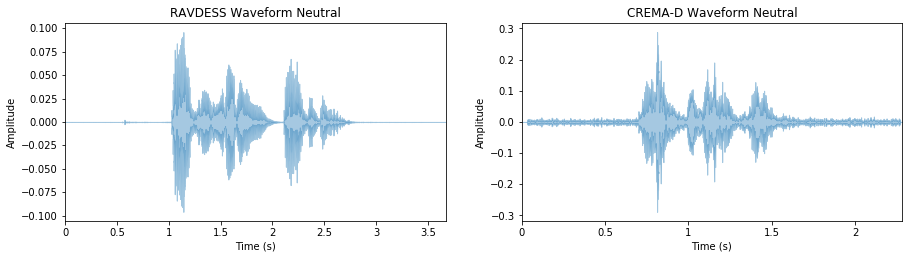

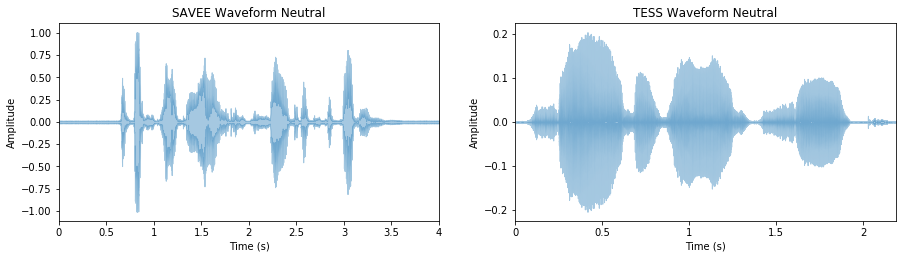

In [40]:
fig = plt.figure(figsize=(15,8))
emotion = 'Neutral'

# WAVEFORM
# display waveform
plt.subplot(2, 2, 1)
librosa.display.waveplot(signal1,sample_rate, alpha=0.4)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("RAVDESS Waveform "+emotion)

plt.subplot(2, 2, 2)
librosa.display.waveplot(signal2,sample_rate, alpha=0.4)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("CREMA-D Waveform "+emotion)


fig = plt.figure(figsize=(15,8))
plt.subplot(2, 2, 3)
librosa.display.waveplot(signal3,sample_rate, alpha=0.4)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("SAVEE Waveform "+emotion)

plt.subplot(2, 2, 4)
librosa.display.waveplot(signal4,sample_rate, alpha=0.4)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("TESS Waveform "+emotion)


The aplitude difference is quite visible, which is probably due to different recording environments, text and individual voice characterstics.

Text(0.5, 1.0, 'TESS Power spectrum Neutral')

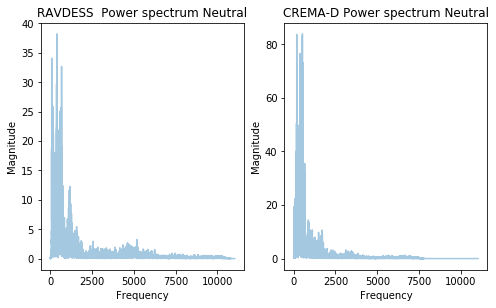

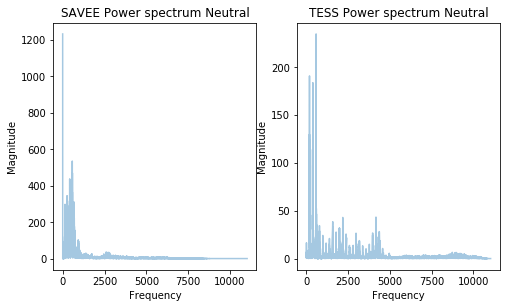

In [41]:
# performing Fourier transformations to draw the power spectrums
# FFT -> power spectrum
# perform Fourier transform
fft1 = np.fft.fft(signal1)
fft2 = np.fft.fft(signal2)
fft3 = np.fft.fft(signal3)
fft4 = np.fft.fft(signal4)

# calculate abs values on complex numbers to get magnitude
spectrum1 = np.abs(fft1)
spectrum2 = np.abs(fft2)
spectrum3 = np.abs(fft3)
spectrum4 = np.abs(fft4)

# create frequency variable
f1 = np.linspace(0, sample_rate, len(spectrum1))
f2 = np.linspace(0, sample_rate, len(spectrum2))
f3 = np.linspace(0, sample_rate, len(spectrum3))
f4 = np.linspace(0, sample_rate, len(spectrum4))

# take half of the spectrum and frequency
left_spectrum1 = spectrum1[:int(len(spectrum1)/2)]
left_f1 = f1[:int(len(spectrum1)/2)]
# take half of the spectrum and frequency
left_spectrum2 = spectrum2[:int(len(spectrum2)/2)]
left_f2 = f2[:int(len(spectrum2)/2)]
# take half of the spectrum and frequency
left_spectrum3 = spectrum3[:int(len(spectrum3)/2)]
left_f3 = f3[:int(len(spectrum3)/2)]
# take half of the spectrum and frequency
left_spectrum4 = spectrum4[:int(len(spectrum4)/2)]
left_f4 = f4[:int(len(spectrum4)/2)]

fig = plt.figure(figsize=(8,10))
plt.subplot(2, 2, 1)
# plot spectrum
plt.plot(left_f1, left_spectrum1, alpha=0.4)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("RAVDESS  Power spectrum "+emotion)

plt.subplot(2, 2,2)
# plot spectrum
plt.plot(left_f2, left_spectrum2, alpha=0.4)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("CREMA-D Power spectrum "+emotion)


fig = plt.figure(figsize=(8,10))

plt.subplot(2, 2, 3)
plt.plot(left_f3, left_spectrum3, alpha=0.4)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("SAVEE Power spectrum "+emotion)

plt.subplot(2, 2, 4)
plt.plot(left_f4, left_spectrum4, alpha=0.4)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("TESS Power spectrum "+emotion)


The power spectrums between the datasets are also very different.

STFT hop length duration is: 0.011609977324263039s
STFT window duration is: 0.18575963718820862s


Text(0.5, 1.0, 'TESS Spectrogram Neutral')

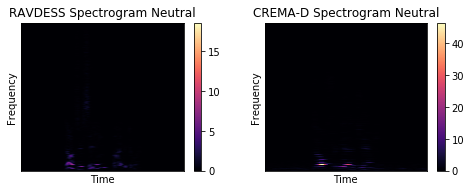

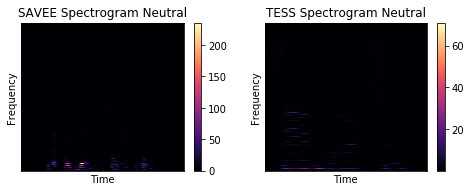

In [42]:
# STFT -> spectrogram
hop_length =256 # in num. of samples
n_fft = 4096 # window in num. of samples

# calculate duration hop length and window in seconds
hop_length_duration = float(hop_length)/sample_rate
n_fft_duration = float(n_fft)/sample_rate

print("STFT hop length duration is: {}s".format(hop_length_duration))
print("STFT window duration is: {}s".format(n_fft_duration))

# perform stft
stft1 = librosa.stft(signal1, n_fft=n_fft, hop_length=hop_length)
stft2 = librosa.stft(signal2, n_fft=n_fft, hop_length=hop_length)
stft3 = librosa.stft(signal3, n_fft=n_fft, hop_length=hop_length)
stft4 = librosa.stft(signal4, n_fft=n_fft, hop_length=hop_length)

# calculate abs values on complex numbers to get magnitude
spectrogram1 = np.abs(stft1)
spectrogram2 = np.abs(stft2)
spectrogram3 = np.abs(stft3)
spectrogram4 = np.abs(stft4)


# display spectrogram


fig = plt.figure(figsize=(8,6))
plt.subplot(2, 2, 1)
librosa.display.specshow(spectrogram1, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.title("RAVDESS Spectrogram "+emotion)

plt.subplot(2, 2,2)
librosa.display.specshow(spectrogram2, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.title("CREMA-D Spectrogram "+emotion)


fig = plt.figure(figsize=(8,6))
plt.subplot(2, 2, 3)
librosa.display.specshow(spectrogram3, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.title("SAVEE Spectrogram "+emotion)

plt.subplot(2, 2, 4)
librosa.display.specshow(spectrogram4, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.title("TESS Spectrogram "+emotion)

In [43]:
# cast amplitude to decibels
log_spectrogram1 = librosa.amplitude_to_db(spectrogram1)
log_spectrogram2 = librosa.amplitude_to_db(spectrogram2)
log_spectrogram3 = librosa.amplitude_to_db(spectrogram3)
log_spectrogram4 = librosa.amplitude_to_db(spectrogram4)

Text(0.5, 1.0, 'TESS Spectogramm (dB) Neutral')

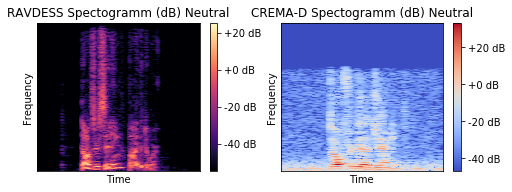

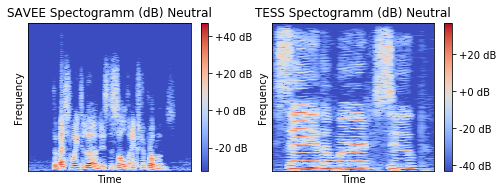

In [44]:
fig = plt.figure(figsize=(8,6))
plt.subplot(2, 2, 1)
librosa.display.specshow(log_spectrogram1, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format="%+2.0f dB")
plt.title("RAVDESS Spectogramm (dB) "+emotion)

plt.subplot(2, 2,2)
librosa.display.specshow(log_spectrogram2, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format="%+2.0f dB")
plt.title("CREMA-D Spectogramm (dB) "+emotion)


fig = plt.figure(figsize=(8,6))
plt.subplot(2, 2, 3)
librosa.display.specshow(log_spectrogram3, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format="%+2.0f dB")
plt.title("SAVEE Spectogramm (dB) "+emotion)

plt.subplot(2, 2, 4)
librosa.display.specshow(log_spectrogram4, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format="%+2.0f dB")
plt.title("TESS Spectogramm (dB) "+emotion)

Text(0.5, 1.0, 'TESS MFCCs Neutral')

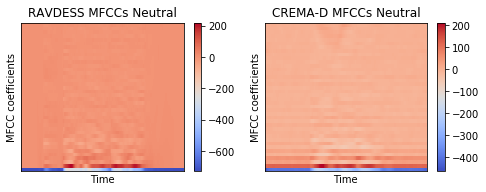

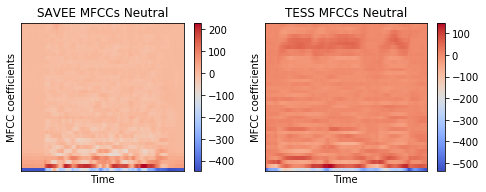

In [45]:
# MFCCs
# extract 13 MFCCs
MFCCs1 = librosa.feature.mfcc(signal1, sample_rate, n_fft=4096, hop_length=256, n_mfcc=40)
MFCCs2 = librosa.feature.mfcc(signal2, sample_rate, n_fft=4096, hop_length=256, n_mfcc=40)
MFCCs3 = librosa.feature.mfcc(signal3, sample_rate, n_fft=4096, hop_length=256, n_mfcc=40)
MFCCs4 = librosa.feature.mfcc(signal4, sample_rate, n_fft=4096, hop_length=256, n_mfcc=40)

# display MFCCs
hop_length=256


fig = plt.figure(figsize=(8,6))
plt.subplot(2, 2, 1)
librosa.display.specshow(MFCCs1, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC coefficients")
plt.colorbar()
plt.title("RAVDESS MFCCs "+emotion)

plt.subplot(2, 2,2)
librosa.display.specshow(MFCCs2, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC coefficients")
plt.colorbar()
plt.title("CREMA-D MFCCs "+emotion)


fig = plt.figure(figsize=(8,6))
plt.subplot(2, 2, 3)
librosa.display.specshow(MFCCs3, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC coefficients")
plt.colorbar()
plt.title("SAVEE MFCCs "+emotion)


plt.subplot(2, 2, 4)
librosa.display.specshow(MFCCs4, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC coefficients")
plt.colorbar()
plt.title("TESS MFCCs "+emotion)